# Design Pattern 6 - Multilabel (Chapter 3)

## Introduction to Design Pattern

The multilabel pattern in about classifying something

![mutlilabel MLP diagram](mldp6_multilabel_mlp_diagram.svg)

### Multiclass example - Ground truth

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 1.0 | 0.0 | 0.0 |
|obs 2  | 0.0 | 1.0 | 0.0 |
|obs 3  | 0.0 | 1.0 | 0.0 |

### Multiclass example - output


|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 0.84 | 0.1 | 0.06 |
|obs 2  | 0.04 | 0.79 | 0.06 |
|obs 3  | 0.08 | 0.91| 0.06 |

### Multilabel example - ground truth

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 1.0 | 0.0 | 1.0 |
|obs 2  | 0.0 | 1.0 | 1.0 |
|obs 3  | 0.0 | 1.0 | 0.0 |

### Multilabel example - output

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 0.79 | 0.11 | 0.83 |
|obs 2  | 0.05 | 0.89 | 0.72 |
|obs 3  | 0.08 | 0.91 | 0.05 |


### Loss Function - Sigmoid

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

For multiclass, we use a softmax, here we use a signoid for each
### Balancing dataset - consider presence of different combinations

### Hierarchical labels
Use flat approach, ensure you have enough example of the "leaf" classes in the hierarchy

### Results - Choosing a threshold


## Example python implementation

Textbook example - https://github.com/GoogleCloudPlatform/ml-design-patterns/blob/master/03_problem_representation/multilabel.ipynb

In [4]:
import matplotlib 
import matplotlib.colors
import pandas
import numpy
import matplotlib.pyplot

In [5]:
import sklearn
import sklearn.neighbors
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics
import sklearn.tree
import sklearn.svm
import sklearn.datasets

In [45]:
import tensorflow as tf

In [30]:
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
colors = {0: 'red', 1: 'blue', 2: 'green'}
num_features = 2
num_classes = 3
threshold=0.35
cluster_std = 3.0
grid_size = 25
num_obs = 1000
centres = [[-7.0, 10.0],[4.0,2.0],[-1.0,-3.0]]
num_blobs = len(centres)

In [19]:
# generate 2d classification dataset
X, y_multiclass = sklearn.datasets.make_blobs(n_samples=num_obs, centers=centres, n_features=num_features, cluster_std=cluster_std)

In [74]:
y_mltlbl = (numpy.concatenate(
    [numpy.sqrt(((X[:,0] - centres[0][0]) ** 2) + ((X[:,1] - centres[0][1]) ** 2)).reshape(num_obs,1) ,
        numpy.sqrt(((X[:,0] - centres[1][0]) ** 2) + ((X[:,1] - centres[1][1]) ** 2)).reshape(num_obs,1) ,
        numpy.sqrt(((X[:,0] - centres[2][0]) ** 2) + ((X[:,1] - centres[2][1]) ** 2)).reshape(num_obs,1), ],
    axis=1,
    ) < 10).astype(int)

In [75]:
y_mltlbl.shape

(1000, 3)

In [71]:
y_mltlbl.sum(axis=0)

array([388, 626, 619])

In [11]:
X.shape

(1000, 2)

In [12]:
y.shape

(1000,)

In [36]:
y_multilabel = (numpy.random.random([num_obs, num_classes]) > threshold).astype(int)

In [37]:
y_multilabel

array([[1, 0, 0],
       [1, 1, 1],
       [1, 1, 0],
       ...,
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [38]:
y_multilabel.sum(axis=0)

array([662, 659, 630])

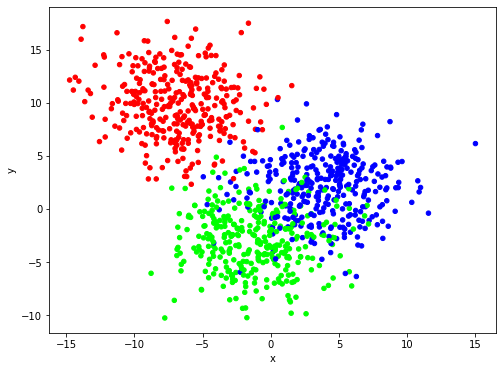

In [34]:
# scatter plot, dots colored by class value
df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

fig1 = matplotlib.pyplot.figure('blobs', figsize=(8,6))
ax1 = fig1.add_subplot(111)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False)

In [76]:
y_mltlbl[:,0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

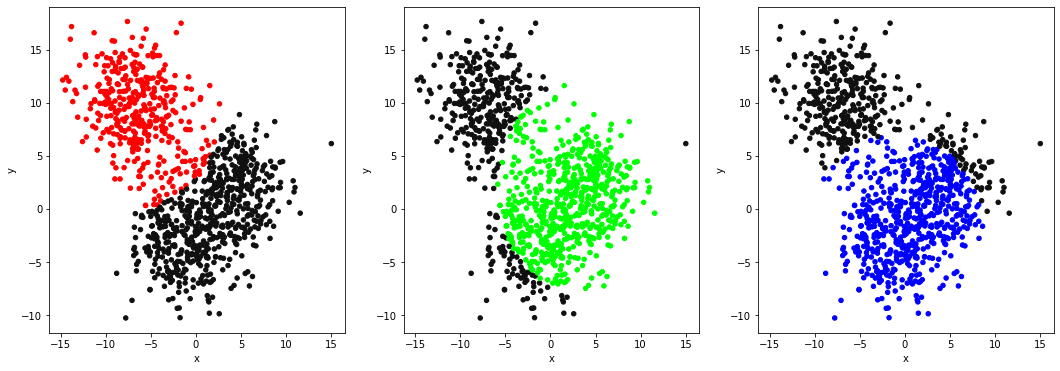

In [77]:
# scatter plot, dots colored by class value
fig1 = matplotlib.pyplot.figure('blobs', figsize=(18,6))
df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,0]))
ax1 = fig1.add_subplot(1,3,1)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#FF0000']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,1]))
ax1 = fig1.add_subplot(1,3,2)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#00FF00']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,2]))
ax1 = fig1.add_subplot(1,3,3)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#0000FF']),
            colorbar=False)

In [82]:
# Note we're using sigmoid output with binary_crossentropy loss
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(num_blobs, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(X, 
          y_mltlbl, 
          epochs=3, 
          batch_size=16, 
          validation_split=0.1)


Epoch 1/3
57/57 [==============================] - 1s 4ms/step - loss: 0.9040 - accuracy: 0.3689 - val_loss: 0.6705 - val_accuracy: 0.7700
Epoch 2/3
57/57 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7656 - val_loss: 0.5266 - val_accuracy: 0.8400
Epoch 3/3
57/57 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8267 - val_loss: 0.4178 - val_accuracy: 0.8600


In [85]:
model.predict(X)

array([[0.44186756, 0.6414912 , 0.5372672 ],
       [0.23335633, 0.8408959 , 0.63407207],
       [0.47738478, 0.3474695 , 0.46815616],
       ...,
       [0.85942626, 0.5264093 , 0.40963343],
       [0.95865506, 0.03182298, 0.05670369],
       [0.5610677 , 0.22605523, 0.36042017]], dtype=float32)

## Real world examples


Try to include some actual/possible examples of where this DP could be used in a weather and climate context.
* classifying objects in an image with multiple images
* applying adjectives that are not mutually exclusive

weather & climate
* classifying features in a satellite image or model run, where may be multiple, example hurricane, high pressure, cold front etc.
